# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ 5: –û–±—É—á–µ–Ω–∏–µ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏

**Import Libraries:**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import random
import matplotlib.pyplot as plt

**–ü—Ä–æ—Å—Ç–∞—è –°–≤–µ—Ä—Ç–æ—á–Ω–∞—è –ù–µ–π—Ä–æ–Ω–Ω–∞—è –°–µ—Ç—å (CNN)**

–ö–æ–¥ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –ø—Ä–æ—Å—Ç—É—é –º–æ–¥–µ–ª—å —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ (CNN) —Å –∏–º–µ–Ω–µ–º SimpleCNN, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—É—é –¥–ª—è –∑–∞–¥–∞—á –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.  
 –≠—Ç–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö —Å–ª–æ–µ–≤ ( conv1–∏ conv2), –∑–∞ –∫–∞–∂–¥—ã–º –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —Å–ª–µ–¥—É–µ—Ç –∞–∫—Ç–∏–≤–∞—Ü–∏—è –≤—ã–ø—Ä—è–º–ª–µ–Ω–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –µ–¥–∏–Ω–∏—Ü—ã (ReLU)   
 –∏ —É—Ä–æ–≤–Ω–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—É–ª–∞. –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π ( fc1) –≤ –∫–æ–Ω—Ü–µ –¥–∞–µ—Ç –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

In [2]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes: int = 2) -> None:
        """
        Simple Convolutional Neural Network (CNN) model.

        Parameters:
        - num_classes: Number of classes for classification.
        """
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 32, num_classes)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network.

        Parameters:
        - x: Input tensor.

        Returns:
        - torch.Tensor: Output tensor.
        """
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        return x

**–ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π**

–í –¥–∞–Ω–Ω–æ–º –∫–æ–¥–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω –∫–ª–∞—Å—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, CustomDataset, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π –¥–ª—è –∑–∞–¥–∞—á –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.  
–≠—Ç–æ—Ç –∫–ª–∞—Å—Å –Ω–æ—Å–∏—Ç –Ω–∞—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä –æ—Ç –∫–ª–∞—Å—Å–∞ Dataset –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ PyTorch, —á—Ç–æ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç —É–¥–æ–±–Ω–æ–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Å –∑–∞–≥—Ä—É–∑—á–∏–∫–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö.

–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ù–∞–±–æ—Ä–∞ –î–∞–Ω–Ω—ã—Ö:  
- –ö–∞–∂–¥–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∑–∞–≥—Ä—É–∂–∞–µ—Ç—Å—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ PIL –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç—Å—è –≤ —Ñ–æ—Ä–º–∞—Ç RGB.  
- –ï—Å–ª–∏ —É–∫–∞–∑–∞–Ω—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, –æ–Ω–∏ –ø—Ä–∏–º–µ–Ω—è—é—Ç—Å—è –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é.  
- –ú–µ—Ç–∫–∏ –ø–æ–ª—É—á–∞—é—Ç—Å—è –∏–∑ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–≥–æ —Å–ø–∏—Å–∫–∞, –∏, –µ—Å–ª–∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –º–µ—Ç–æ–∫, —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –º–µ—Ç–∫–∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É—é—Ç—Å—è –≤ —á–∏—Å–ª–æ–≤—ã–µ –∏–Ω–¥–µ–∫—Å—ã.

In [3]:
class CustomDataset(Dataset):
    def __init__(
        self,
        img_paths: list,
        labels: list,
        transform: transforms.Compose = None,
        label_mapping: dict = None,
    ) -> None:
        """
        Custom dataset class for image classification.

        Parameters:
        - img_paths: List of image file paths.
        - labels: List of corresponding labels.
        - transform: Image transformations.
        - label_mapping: Mapping of label strings to numerical indices.
        """
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform
        self.label_mapping = label_mapping

    def __len__(self) -> int:
        """
        Get the length of the dataset.

        Returns:
        - int: Length of the dataset.
        """
        return len(self.img_paths)

    def __getitem__(self, idx: int) -> tuple:
        """
        Get item from the dataset.

        Parameters:
        - idx: Index of the item.

        Returns:
        - tuple: (image, label)
        """
        img_path = self.img_paths[idx]
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        label_str = self.labels[idx]
        label = self.label_mapping[label_str] if self.label_mapping else int(
            label_str)

        return img, torch.tensor(label)

**–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –î–∞—Ç–∞—Å–µ—Ç–∞**

–î–∞–Ω–Ω—ã–π –∫–æ–¥ —Ä–µ–∞–ª–∏–∑—É–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é split_dataset, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—É—é –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏.

–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏:  
- –í—ã–≤–æ–¥–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ä–∞–∑–º–µ—Ä–∞—Ö –æ–±—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, –∞ —Ç–∞–∫–∂–µ —Ä–∞–∑–º–µ—Ä–∞—Ö –æ–±—É—á–∞—é—â–µ–π, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫.  
- –î–∞–Ω–Ω—ã–µ —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—é—Ç—Å—è –¥–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.  
- –í—ã–±—Ä–∞—Å—ã–≤–∞–µ—Ç—Å—è –∏—Å–∫–ª—é—á–µ–Ω–∏–µ, –µ—Å–ª–∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

In [4]:
def split_dataset(
    img_list: list,
    labels: list,
    train_size: float = 0.8,
    val_size: float = 0.1,
    test_size: float = 0.1,
) -> tuple:
    """
    Split the dataset into training, validation, and test sets.

    Parameters:
    - img_list: List of image file paths.
    - labels: List of corresponding labels.
    - train_size: Percentage of data for training.
    - val_size: Percentage of data for validation.
    - test_size: Percentage of data for testing.

    Returns:
    - tuple: img_train, labels_train, img_val, labels_val, img_test, labels_test
    """
    total_size = len(img_list)
    train_size = int(total_size * train_size)
    val_size = int(total_size * val_size)
    test_size = int(total_size * test_size)
    if 'device_info_printed' not in globals():
        print(f"Total dataset size: {total_size}")
        print(f"Training dataset size: {train_size}")
        print(f"Validation dataset size: {val_size}")
        print(f"Test dataset size: {test_size}")
        globals()['device_info_printed'] = True

    if train_size <= 0:
        raise ValueError("Not enough samples for training.")

    combined = list(zip(img_list, labels))
    random.seed(42)
    random.shuffle(combined)
    img_list[:], labels[:] = zip(*combined)

    img_val, labels_val = img_list[:val_size], labels[:val_size]
    img_test, labels_test = img_list[val_size:val_size +
                                     test_size], labels[val_size:val_size + test_size]
    img_train, labels_train = img_list[val_size + test_size:val_size + test_size +
                                       train_size], labels[val_size + test_size:val_size + test_size + train_size]

    return img_train, labels_train, img_val, labels_val, img_test, labels_test



**–ó–∞–≥—Ä—É–∑–∫–∞ –î–∞—Ç–∞—Å–µ—Ç–∞**

–î–∞–Ω–Ω—ã–π –∫–æ–¥ —Ä–µ–∞–ª–∏–∑—É–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é load_dataset, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—É—é –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏–∑ CSV-—Ñ–∞–π–ª–∞ –∏ –µ–≥–æ –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏.

–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏:  
- –î–∞–Ω–Ω—ã–µ —Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –∏–∑ CSV-—Ñ–∞–π–ª–∞, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–≥–æ –≤ –≤–∏–¥–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ Pandas.  
- –î–∞—Ç–∞—Å–µ—Ç —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ—Ç—Å—è –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.  
- –í—ã–≤–æ–¥–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ä–∞–∑–º–µ—Ä–∞—Ö –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, –∞ —Ç–∞–∫–∂–µ —Ä–∞–∑–º–µ—Ä–∞—Ö –æ–±—É—á–∞—é—â–µ–π, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫.

–û–±—Ä–∞–±–æ—Ç–∫–∞ –ò—Å–∫–ª—é—á–µ–Ω–∏–π:  
- –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Ñ–∞–π–ª–∞, –ø—É—Å—Ç–æ–π —Ñ–∞–π–ª, –æ—à–∏–±–∫–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω–∞—è –æ—à–∏–±–∫–∞.


In [5]:
def load_dataset(
    csv_path: str,
    train_size: float = 0.8,
    val_size: float = 0.1,
    test_size: float = 0.1,
) -> tuple:
    """
    Load dataset from a CSV file and split it into training, validation, and test sets.

    Parameters:
    - csv_path: Path to the CSV file containing image annotations.
    - train_size: Percentage of data for training.
    - val_size: Percentage of data for validation.
    - test_size: Percentage of data for testing.

    Returns:
    - tuple: img_train, labels_train, img_val, labels_val, img_test, labels_test
    """
    try:
        dframe = pd.read_csv(
            csv_path, delimiter=",", names=["Absolute path", "Relative path", "Class"]
        )
        img_list = dframe["Absolute path"].tolist()
        labels = dframe["Class"].tolist()

        if not img_list or not labels:
            raise ValueError("Empty dataset: No images or labels found.")

        img_list, labels = list(img_list), list(labels)

        combined = list(zip(img_list, labels))
        random.seed(42)
        random.shuffle(combined)
        img_list[:], labels[:] = zip(*combined)

        img_train, labels_train, img_val, labels_val, img_test, labels_test = split_dataset(
            img_list, labels, train_size=train_size, val_size=val_size, test_size=test_size
        )

        return img_train, labels_train, img_val, labels_val, img_test, labels_test
    except FileNotFoundError:
        print(f"Error: File not found at path '{csv_path}'")
        return [], [], [], [], [], []
    except pd.errors.EmptyDataError:
        print(f"Error: Empty file at path '{csv_path}'")
        return [], [], [], [], [], []
    except ValueError as ve:
        print(f"ValueError: {ve}")
        return [], [], [], [], [], []
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return [], [], [], [], [], []

**–†–∞—Å—á–µ—Ç –¢–æ—á–Ω–æ—Å—Ç–∏ (Accuracy)**

–î–∞–Ω–Ω—ã–π –∫–æ–¥ —Å–æ–¥–µ—Ä–∂–∏—Ç —Ñ—É–Ω–∫—Ü–∏—é calculate_accuracy, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–∞ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ (accuracy) –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∏ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫.

–û–ø–∏—Å–∞–Ω–∏–µ:  
- –ö–æ–¥ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä —Å–ø–∏—Å–∫–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏, —Å–∫–æ–ª—å–∫–æ –∏–∑ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ —Å–æ–≤–ø–∞–¥–∞—é—Ç —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏.  
- –†–∞—Å—á–µ—Ç –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø—É—Ç–µ–º –¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–∞ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.

–í–æ–∑–≤—Ä–∞—â–∞–µ–º–æ–µ –ó–Ω–∞—á–µ–Ω–∏–µ:  
- –í–µ—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–µ–µ –ø—Ä–æ—Ü–µ–Ω—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏.

In [6]:
def calculate_accuracy(predictions: list, true_labels: list) -> float:
    """
    Calculate accuracy given predicted and true labels.

    Parameters:
    - predictions: Predicted labels.
    - true_labels: True labels.

    Returns:
    - float: Accuracy.
    """
    correct = sum(p == t for p, t in zip(predictions, true_labels))
    total = len(predictions)
    return correct / total

**–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –†–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –û–±—É—á–µ–Ω–∏—è**

–î–∞–Ω–Ω—ã–π –∫–æ–¥ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é plot_training_results, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–∞ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:  
- train_losses: –°–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.  
- val_losses: –°–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.  
- val_accuracies: –°–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.  
- learning_rate: –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è (learning rate).  
- batch_size: –†–∞–∑–º–µ—Ä –ø–∞–∫–µ—Ç–∞ (batch size).

–î–µ—Ç–∞–ª–∏ –ì—Ä–∞—Ñ–∏–∫–∞:

–õ–µ–≤—ã–π –ì—Ä–∞—Ñ–∏–∫ (subplot 1, 2, 1):  
- –õ–∏–Ω–∏–∏ –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π (Training Loss) –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π (Validation Loss) –≤—ã–±–æ—Ä–∫–∞—Ö.  
- –¢–æ—á–∫–∏ (marker='o') –æ–±–æ–∑–Ω–∞—á–∞—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ.  
- –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞: "Training and Validation Loss".  
- –û—Å—å X: –≠–ø–æ—Ö–∏.  
- –û—Å—å Y: –ó–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.  
- –õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏—è –ª–∏–Ω–∏–π.

–ü—Ä–∞–≤—ã–π –ì—Ä–∞—Ñ–∏–∫ (subplot 1, 2, 2):  
- –õ–∏–Ω–∏—è –¥–ª—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ (Validation Accuracy).  
- –¢–æ—á–∫–∏ (marker='o') –æ–±–æ–∑–Ω–∞—á–∞—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ.  
- –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞: "Validation Accuracy".  
- –û—Å—å X: –≠–ø–æ—Ö–∏.  
- –û—Å—å Y: –ó–Ω–∞—á–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏.  

- –°–≤–µ—Ä—Ö—É: –û–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫, –≤–∫–ª—é—á–∞—é—â–∏–π –∑–Ω–∞—á–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä–∞ –ø–∞–∫–µ—Ç–∞.
–õ–µ–≥–µ–Ω–¥–∞ –¥–ª—è –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏—è –ª–∏–Ω–∏–∏.

In [7]:
def plot_training_results(
    train_losses: list,
    val_losses: list,
    train_accuracies: list,
    val_accuracies: list,
    learning_rate: float,
    batch_size: int,
) -> None:
    """
    Plot training and validation results.

    Parameters:
    - train_losses: Training losses.
    - val_losses: Validation losses.
    - train_accuracies: Training accuracies.
    - val_accuracies: Validation accuracies.
    - learning_rate: Learning rate.
    - batch_size: Batch size.
    """
    epochs = list(range(1, len(train_losses) + 1))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies,
             label='Training Accuracy', marker='o', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy',
             marker='o', color='green')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.suptitle(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}')
    plt.legend()

    plt.tight_layout()
    plt.show()

**–§—É–Ω–∫—Ü–∏—è –û–±—É—á–µ–Ω–∏—è –ú–æ–¥–µ–ª–∏**

–≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è (train_model) –≤—ã–ø–æ–ª–Ω—è–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã–≤–æ–¥–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è, –≤–∫–ª—é—á–∞—è –ø–æ—Ç–µ—Ä–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–∞—Ö, –∞ —Ç–∞–∫–∂–µ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
- model: –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
- train_loader: –ó–∞–≥—Ä—É–∑—á–∏–∫ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞.
- val_loader: –ó–∞–≥—Ä—É–∑—á–∏–∫ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞.
- device: –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, "cuda" –∏–ª–∏ "cpu").
- num_epochs: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è.
- learning_rate: –¢–µ–º–ø –æ–±—É—á–µ–Ω–∏—è.

–î–µ—Ç–∞–ª–∏:
- –ú–æ–¥–µ–ª—å –∏ –¥–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ—â–∞—é—Ç—Å—è –Ω–∞ —É–∫–∞–∑–∞–Ω–Ω–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ.
- –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–π–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä Adam.
- –í –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ:
    - –ú–æ–¥–µ–ª—å –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—Å—è –≤ —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è (model.train()).
    - –û–±—É—á–∞—é—â–∏–π –Ω–∞–±–æ—Ä –ø—Ä–æ–≥–æ–Ω—è–µ—Ç—Å—è —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å, –ø–æ—Ç–µ—Ä–∏ –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –∏ –æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è –≤–µ—Å–∞.
    - –ó–∞–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –ø–æ—Ç–µ—Ä–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ.
    - –ú–æ–¥–µ–ª—å –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—Å—è –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏ (model.eval()).
    - –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –Ω–∞–±–æ—Ä –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏, –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –ø–æ—Ç–µ—Ä–∏ –∏ —Ç–æ—á–Ω–æ—Å—Ç—å.
    - –ó–∞–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –ø–æ—Ç–µ—Ä–∏ –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ.

–í—ã–≤–æ–¥:
- –í –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ –≤—ã–≤–æ–¥–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–æ—Ç–µ—Ä—è—Ö –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ.

–í–æ–∑–≤—Ä–∞—â–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ:
- –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∫–æ—Ä—Ç–µ–∂, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Å–ø–∏—Å–∫–∏ –æ–±—É—á–∞—é—â–∏—Ö –ø–æ—Ç–µ—Ä—å, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ—Ç–µ—Ä—å –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–æ—á–Ω–æ—Å—Ç–µ–π.


In [8]:
def train_model(
    model: nn.Module,
    train_loader: DataLoader,
    val_loader: DataLoader,
    device: torch.device,
    num_epochs: int = 10,
    learning_rate: float = 0.001,
) -> tuple:
    """
    Train the given model using the specified data loaders.

    Parameters:
    - model: Neural network model.
    - train_loader: Training data loader.
    - val_loader: Validation data loader.
    - device: Device for training (e.g., "cuda" or "cpu").
    - num_epochs: Number of training epochs.
    - learning_rate: Learning rate.

    Returns:
    - tuple: train_losses, val_losses, train_accuracies, val_accuracies
    """
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_losses = []
        epoch_train_predictions = []
        epoch_train_true_labels = []

        for images, labels in train_loader:
            images = torch.stack([img.to(device) for img in images])
            labels = torch.as_tensor(
                labels, dtype=torch.long).clone().detach().to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_losses.append(loss.item())

            _, predicted = torch.max(outputs, 1)
            epoch_train_predictions.extend(predicted.cpu().numpy())
            epoch_train_true_labels.extend(labels.cpu().numpy())

        avg_train_loss = sum(epoch_train_losses) / len(epoch_train_losses)
        train_losses.append(avg_train_loss)

        train_accuracy = calculate_accuracy(
            epoch_train_predictions, epoch_train_true_labels)
        train_accuracies.append(train_accuracy)

        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            epoch_val_predictions = []
            epoch_val_true_labels = []
            for images, labels in val_loader:
                images = torch.stack([img.to(device) for img in images])
                labels = torch.as_tensor(
                    labels, dtype=torch.long).clone().detach().to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                epoch_val_predictions.extend(predicted.cpu().numpy())
                epoch_val_true_labels.extend(labels.cpu().numpy())

            val_loss /= len(val_loader)
            accuracy = calculate_accuracy(
                epoch_val_predictions, epoch_val_true_labels)
            val_losses.append(val_loss)
            val_accuracies.append(accuracy)

            print(
                f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

**–û—Ü–µ–Ω–∫–∞ –ú–æ–¥–µ–ª–∏ –Ω–∞ –¢–µ—Å—Ç–æ–≤–æ–º –ù–∞–±–æ—Ä–µ**

–≠—Ç–æ—Ç –∫–æ–¥ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é evaluate_model, –∫–æ—Ç–æ—Ä–∞—è –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã–≤–æ–¥–∏—Ç —Ç–æ—á–Ω–æ—Å—Ç—å.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
- model: –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏.
- test_loader: –ó–∞–≥—Ä—É–∑—á–∏–∫ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞.
- device: –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "cuda" –∏–ª–∏ "cpu").

–î–µ—Ç–∞–ª–∏:
- –ú–æ–¥–µ–ª—å –æ—Ç–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è –Ω–∞ —É–∫–∞–∑–∞–Ω–Ω–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (model.to(device)).
- –ú–æ–¥–µ–ª—å –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—Å—è –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏ (model.eval()).
- –ë–µ–∑ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º torch.no_grad(), –º–æ–¥–µ–ª—å –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.
- –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ —Å–æ–±–∏—Ä–∞—é—Ç—Å—è –≤ —Å–ø–∏—Å–∫–∏ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ calculate_accuracy.

–í—ã–≤–æ–¥:
- –í—ã–≤–æ–¥–∏—Ç—Å—è —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.


In [9]:
def evaluate_model(model: nn.Module, test_loader: DataLoader, device: torch.device) -> None:
    """
    Evaluate the model on the test set and print the accuracy.

    Parameters:
    - model: Neural network model.
    - test_loader: Test data loader.
    - device: Device for evaluation (e.g., "cuda" or "cpu").
    """
    model.to(device)
    model.eval()
    with torch.no_grad():
        test_predictions = []
        test_true_labels = []
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_predictions.extend(predicted.cpu().numpy())
            test_true_labels.extend(labels.cpu().numpy())

    test_accuracy = calculate_accuracy(test_predictions, test_true_labels)
    print(f"Test Accuracy: {test_accuracy:.4f}")

**–û—Å–Ω–æ–≤–Ω–∞—è –§—É–Ω–∫—Ü–∏—è: –û–±—É—á–µ–Ω–∏–µ –∏ –û—Ü–µ–Ω–∫–∞ –ú–æ–¥–µ–ª–∏**

–≠—Ç–∞ –æ—Å–Ω–æ–≤–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (main) –≤—ã–ø–æ–ª–Ω—è–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫—É –º–æ–¥–µ–ª–∏ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π —Ç–µ–º–ø–∞ –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä–∞ –ø–∞–∫–µ—Ç–∞.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:  
- csv_path: –ü—É—Ç—å –∫ —Ñ–∞–π–ª—É CSV —Å –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.  
- num_epochs: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è.

–î–µ—Ç–∞–ª–∏:  
- –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (cuda –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ, –∏–Ω–∞—á–µ cpu).  
- –ó–∞–≥—Ä—É–∂–∞—é—Ç—Å—è –¥–∞–Ω–Ω—ã–µ –∏ —Ä–∞–∑–¥–µ–ª—è—é—Ç—Å—è –Ω–∞ –æ–±—É—á–∞—é—â–∏–π, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã.  
- –°–æ–∑–¥–∞–µ—Ç—Å—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –º–µ—Ç–æ–∫ –≤ —á–∏—Å–ª–æ–≤—ã–µ –∏–Ω–¥–µ–∫—Å—ã.  
- –û–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è —Ç–µ–º–ø—ã –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä—ã –ø–∞–∫–µ—Ç–æ–≤ –¥–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤.  
- –î–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Ç–µ–º–ø–∞ –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä–∞ –ø–∞–∫–µ—Ç–∞:  
    - –°–æ–∑–¥–∞–µ—Ç—Å—è –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏ –∑–∞–≥—Ä—É–∑—á–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.  
    - –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –º–æ–¥–µ–ª—å CNN (SimpleCNN) —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–ª–∞—Å—Å–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –º–µ—Ç–æ–∫.  
    - –ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ train_model.  
    - –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É—é—Ç—Å—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ plot_training_results.  
    - –ú–æ–¥–µ–ª—å –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ evaluate_model.

–í—ã–≤–æ–¥:  
- –î–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Ç–µ–º–ø–∞ –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä–∞ –ø–∞–∫–µ—Ç–∞ –≤—ã–≤–æ–¥–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—Ü–µ–Ω–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.

In [10]:
def main(csv_path: str, num_epochs: int = 10) -> nn.Module:
    """
    Main function for training and evaluating the model.

    Parameters:
    - csv_path: Path to the CSV file containing image annotations.
    - num_epochs: Number of training epochs.

    Returns:
    - nn.Module: Trained neural network model.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    img_train, labels_train, img_val, labels_val, img_test, labels_test = load_dataset(
        csv_path)

    unique_labels = set(labels_train + labels_val + labels_test)
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

    learning_rates = [0.001, 0.01, 0.1]
    batch_sizes = [16, 32, 64]

    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            print(
                f"\nExperiment: Learning Rate = {learning_rate}, Batch Size = {batch_size}")

            transform = transforms.Compose([
                transforms.Resize((128, 128)),
                transforms.ToTensor(),
            ])

            train_dataset = CustomDataset(
                img_train, labels_train, transform, label_mapping)
            val_dataset = CustomDataset(
                img_val, labels_val, transform, label_mapping)
            test_dataset = CustomDataset(
                img_test, labels_test, transform, label_mapping)

            train_loader = DataLoader(
                train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
            val_loader = DataLoader(
                val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
            test_loader = DataLoader(
                test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

            model = SimpleCNN(num_classes=len(unique_labels)).to(device)

            train_losses, val_losses, train_accuracies, val_accuracies = train_model(
                model, train_loader, val_loader, device,
                num_epochs=num_epochs, learning_rate=learning_rate)

            plot_training_results(
                train_losses, val_losses, train_accuracies, val_accuracies, learning_rate, batch_size)

            evaluate_model(model, test_loader, device)
    return model

**–û—Å–Ω–æ–≤–Ω–æ–π –±–ª–æ–∫ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: –û–±—É—á–µ–Ω–∏–µ –∏ –û—Ü–µ–Ω–∫–∞ –ú–æ–¥–µ–ª–∏**

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –∫–æ–¥–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –æ–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –∏ –æ—Ü–µ–Ω–∫–∞ –µ–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

–®–∞–≥–∏:
1. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (GPU –∏–ª–∏ CPU).
2. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –Ω–∞–±–æ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.
3. –°–æ–∑–¥–∞–Ω–∏–µ —É–Ω–∏–∫–∞–ª—å–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤.
4. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ main, —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –≤ 10.
5. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –≤ —Ñ–∞–π–ª simple_cnn_model.pth.
6. –ó–∞–≥—Ä—É–∑–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π –æ—Ü–µ–Ω–∫–∏.
7. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏ –æ—Ç–ø—Ä–∞–≤–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–ª–∞—Å—Å–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –Ω–æ–≤–æ–π –º–æ–¥–µ–ª–∏.
8. –í—ã–≤–æ–¥ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∏–Ω–¥–µ–∫—Å–∞ –∫–ª–∞—Å—Å–∞ –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
9. –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –ø—Ä–∏–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

Using device: cuda
Total dataset size: 2000
Training dataset size: 1600
Validation dataset size: 200
Test dataset size: 200
Using device: cuda

Experiment: Learning Rate = 0.001, Batch Size = 16
Epoch 1/10, Training Loss: 0.3730, Validation Loss: 0.1067, Training Accuracy: 0.8394, Validation Accuracy: 0.9850
Epoch 2/10, Training Loss: 0.0899, Validation Loss: 0.0445, Training Accuracy: 0.9681, Validation Accuracy: 0.9900
Epoch 3/10, Training Loss: 0.0333, Validation Loss: 0.0421, Training Accuracy: 0.9931, Validation Accuracy: 0.9900
Epoch 4/10, Training Loss: 0.0108, Validation Loss: 0.0412, Training Accuracy: 0.9988, Validation Accuracy: 0.9800
Epoch 5/10, Training Loss: 0.0060, Validation Loss: 0.0266, Training Accuracy: 0.9994, Validation Accuracy: 0.9900
Epoch 6/10, Training Loss: 0.0016, Validation Loss: 0.0312, Training Accuracy: 1.0000, Validation Accuracy: 0.9850
Epoch 7/10, Training Loss: 0.0011, Validation Loss: 0.0317, Training Accuracy: 1.0000, Validation Accuracy: 0.9850


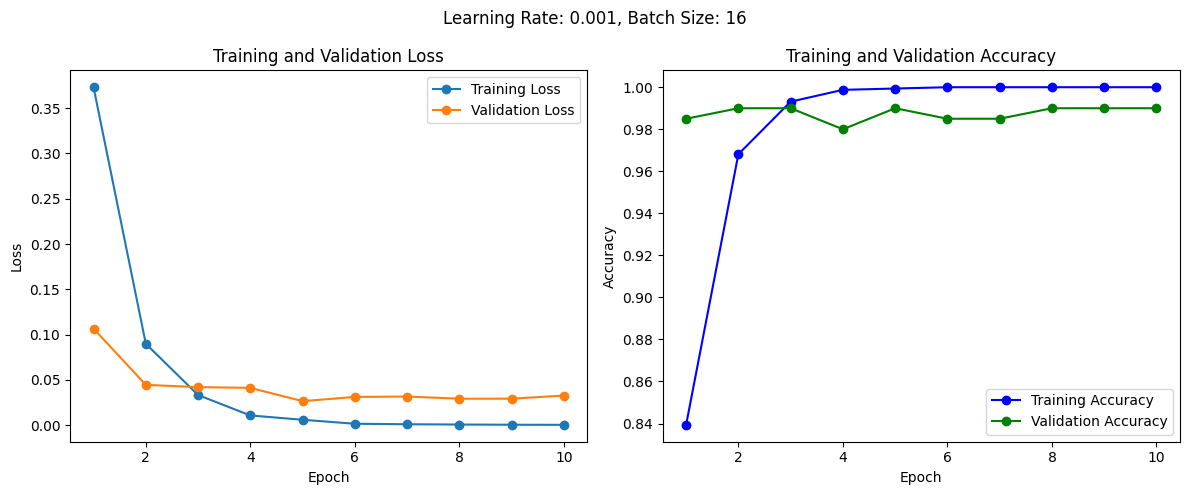

Test Accuracy: 0.9850

Experiment: Learning Rate = 0.001, Batch Size = 32
Epoch 1/10, Training Loss: 0.5054, Validation Loss: 0.2341, Training Accuracy: 0.7525, Validation Accuracy: 0.9350
Epoch 2/10, Training Loss: 0.1850, Validation Loss: 0.1244, Training Accuracy: 0.9256, Validation Accuracy: 0.9550
Epoch 3/10, Training Loss: 0.0952, Validation Loss: 0.1232, Training Accuracy: 0.9650, Validation Accuracy: 0.9450
Epoch 4/10, Training Loss: 0.0626, Validation Loss: 0.0415, Training Accuracy: 0.9812, Validation Accuracy: 0.9950
Epoch 5/10, Training Loss: 0.0340, Validation Loss: 0.0571, Training Accuracy: 0.9906, Validation Accuracy: 0.9800
Epoch 6/10, Training Loss: 0.0252, Validation Loss: 0.0324, Training Accuracy: 0.9938, Validation Accuracy: 0.9950
Epoch 7/10, Training Loss: 0.0101, Validation Loss: 0.0197, Training Accuracy: 0.9994, Validation Accuracy: 0.9900
Epoch 8/10, Training Loss: 0.0071, Validation Loss: 0.0228, Training Accuracy: 0.9994, Validation Accuracy: 0.9950
Epoch 

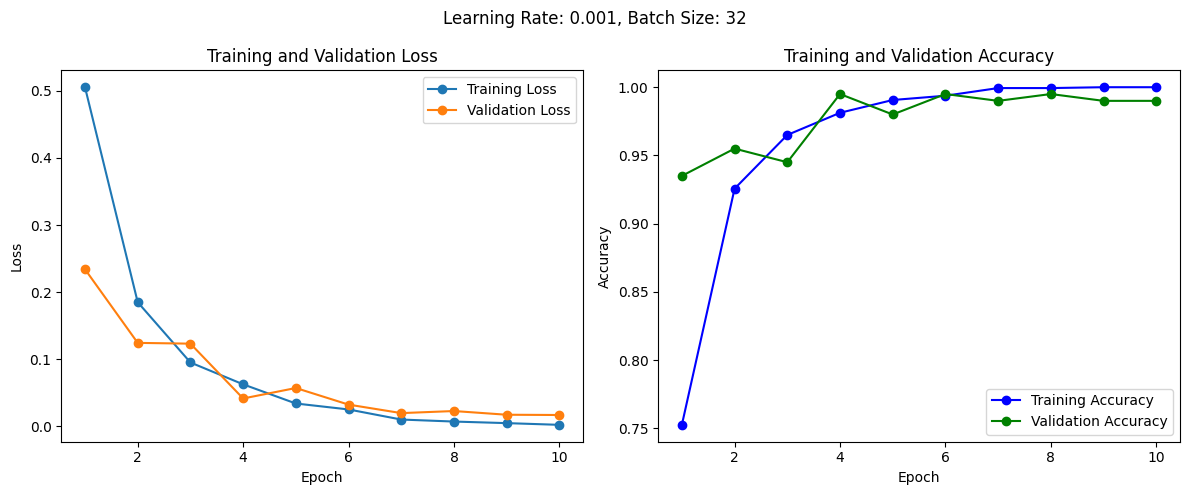

Test Accuracy: 0.9850

Experiment: Learning Rate = 0.001, Batch Size = 64
Epoch 1/10, Training Loss: 0.7280, Validation Loss: 0.5308, Training Accuracy: 0.6581, Validation Accuracy: 0.8000
Epoch 2/10, Training Loss: 0.3236, Validation Loss: 0.2125, Training Accuracy: 0.8725, Validation Accuracy: 0.9750
Epoch 3/10, Training Loss: 0.1544, Validation Loss: 0.1284, Training Accuracy: 0.9444, Validation Accuracy: 0.9850
Epoch 4/10, Training Loss: 0.0947, Validation Loss: 0.1063, Training Accuracy: 0.9706, Validation Accuracy: 0.9800
Epoch 5/10, Training Loss: 0.0577, Validation Loss: 0.0766, Training Accuracy: 0.9825, Validation Accuracy: 0.9850
Epoch 6/10, Training Loss: 0.0364, Validation Loss: 0.1123, Training Accuracy: 0.9900, Validation Accuracy: 0.9750
Epoch 7/10, Training Loss: 0.0224, Validation Loss: 0.0728, Training Accuracy: 0.9969, Validation Accuracy: 0.9850
Epoch 8/10, Training Loss: 0.0131, Validation Loss: 0.0521, Training Accuracy: 0.9994, Validation Accuracy: 0.9900
Epoch 

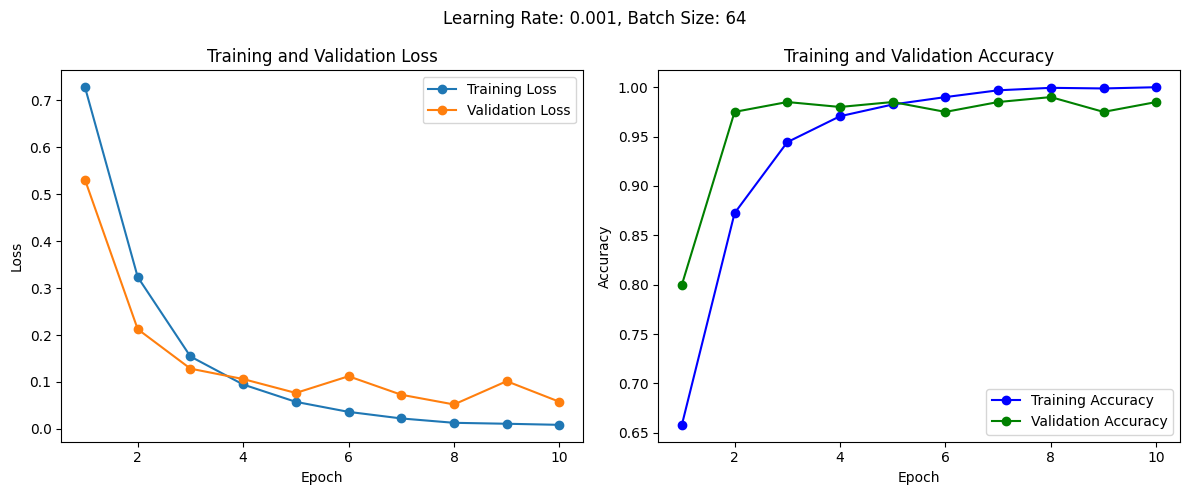

Test Accuracy: 0.9800

Experiment: Learning Rate = 0.01, Batch Size = 16
Epoch 1/10, Training Loss: 1.1413, Validation Loss: 0.5338, Training Accuracy: 0.5687, Validation Accuracy: 0.7000
Epoch 2/10, Training Loss: 0.3772, Validation Loss: 0.2539, Training Accuracy: 0.8325, Validation Accuracy: 0.9450
Epoch 3/10, Training Loss: 0.1708, Validation Loss: 0.1193, Training Accuracy: 0.9413, Validation Accuracy: 0.9600
Epoch 4/10, Training Loss: 0.1034, Validation Loss: 0.1096, Training Accuracy: 0.9606, Validation Accuracy: 0.9700
Epoch 5/10, Training Loss: 0.0295, Validation Loss: 0.0770, Training Accuracy: 0.9888, Validation Accuracy: 0.9800
Epoch 6/10, Training Loss: 0.0105, Validation Loss: 0.0406, Training Accuracy: 0.9975, Validation Accuracy: 0.9800
Epoch 7/10, Training Loss: 0.0025, Validation Loss: 0.0670, Training Accuracy: 1.0000, Validation Accuracy: 0.9800
Epoch 8/10, Training Loss: 0.0006, Validation Loss: 0.0755, Training Accuracy: 1.0000, Validation Accuracy: 0.9800
Epoch 9

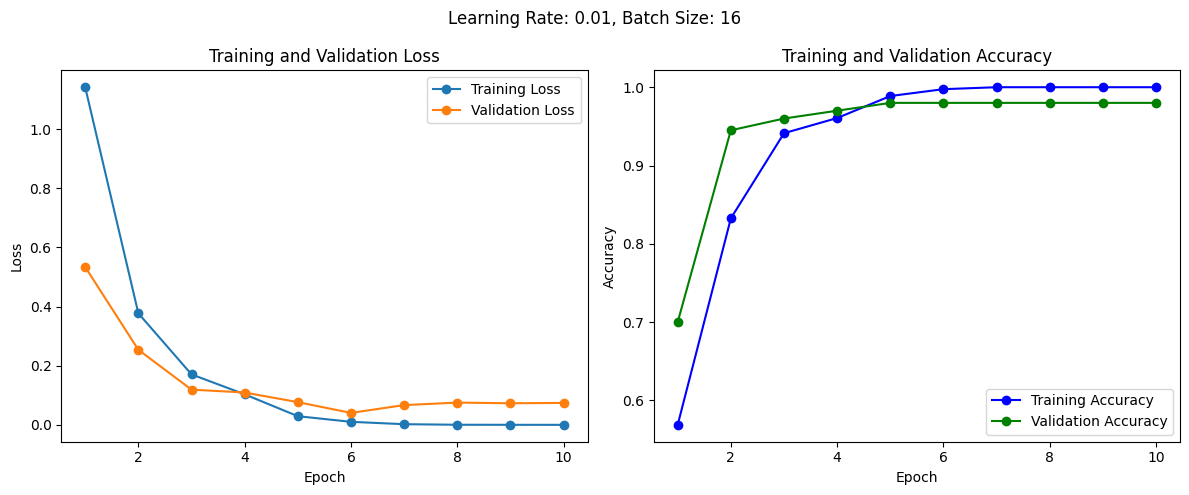

Test Accuracy: 0.9400

Experiment: Learning Rate = 0.01, Batch Size = 32
Epoch 1/10, Training Loss: 0.8882, Validation Loss: 0.2282, Training Accuracy: 0.7325, Validation Accuracy: 0.9100
Epoch 2/10, Training Loss: 0.1941, Validation Loss: 0.0660, Training Accuracy: 0.9319, Validation Accuracy: 0.9850
Epoch 3/10, Training Loss: 0.0975, Validation Loss: 0.0571, Training Accuracy: 0.9656, Validation Accuracy: 0.9900
Epoch 4/10, Training Loss: 0.0257, Validation Loss: 0.0241, Training Accuracy: 0.9931, Validation Accuracy: 0.9950
Epoch 5/10, Training Loss: 0.0155, Validation Loss: 0.1155, Training Accuracy: 0.9956, Validation Accuracy: 0.9850
Epoch 6/10, Training Loss: 0.0070, Validation Loss: 0.0450, Training Accuracy: 0.9981, Validation Accuracy: 0.9950
Epoch 7/10, Training Loss: 0.0006, Validation Loss: 0.0537, Training Accuracy: 1.0000, Validation Accuracy: 0.9950
Epoch 8/10, Training Loss: 0.0003, Validation Loss: 0.0610, Training Accuracy: 1.0000, Validation Accuracy: 0.9850
Epoch 9

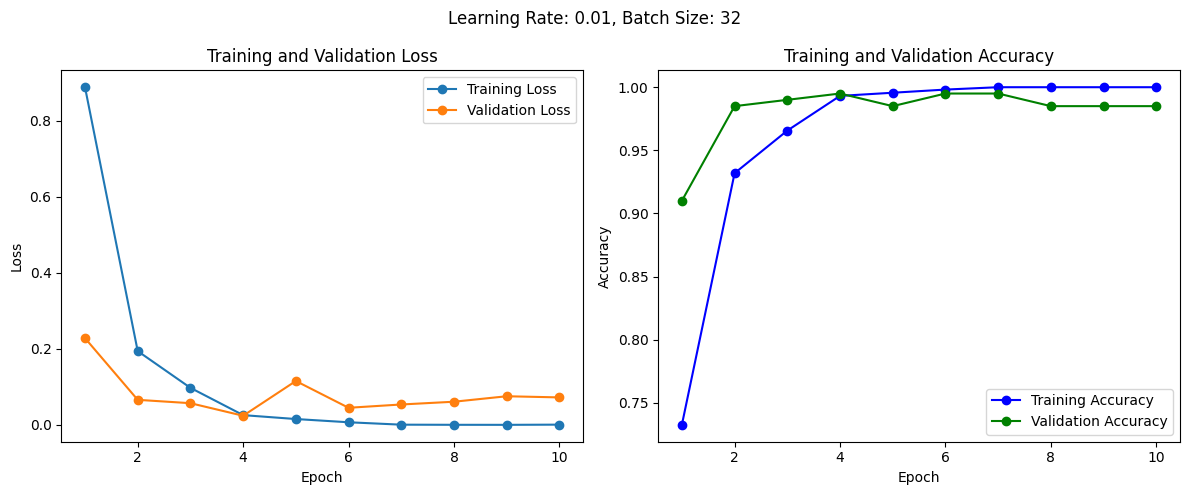

Test Accuracy: 0.9700

Experiment: Learning Rate = 0.01, Batch Size = 64
Epoch 1/10, Training Loss: 1.0568, Validation Loss: 0.2546, Training Accuracy: 0.7225, Validation Accuracy: 0.8800
Epoch 2/10, Training Loss: 0.2066, Validation Loss: 0.1362, Training Accuracy: 0.9150, Validation Accuracy: 0.9650
Epoch 3/10, Training Loss: 0.1095, Validation Loss: 0.1089, Training Accuracy: 0.9594, Validation Accuracy: 0.9900
Epoch 4/10, Training Loss: 0.0518, Validation Loss: 0.0846, Training Accuracy: 0.9838, Validation Accuracy: 0.9850
Epoch 5/10, Training Loss: 0.0292, Validation Loss: 0.0688, Training Accuracy: 0.9925, Validation Accuracy: 0.9900
Epoch 6/10, Training Loss: 0.0103, Validation Loss: 0.0673, Training Accuracy: 0.9981, Validation Accuracy: 0.9900
Epoch 7/10, Training Loss: 0.0055, Validation Loss: 0.0671, Training Accuracy: 1.0000, Validation Accuracy: 0.9900
Epoch 8/10, Training Loss: 0.0034, Validation Loss: 0.0806, Training Accuracy: 1.0000, Validation Accuracy: 0.9850
Epoch 9

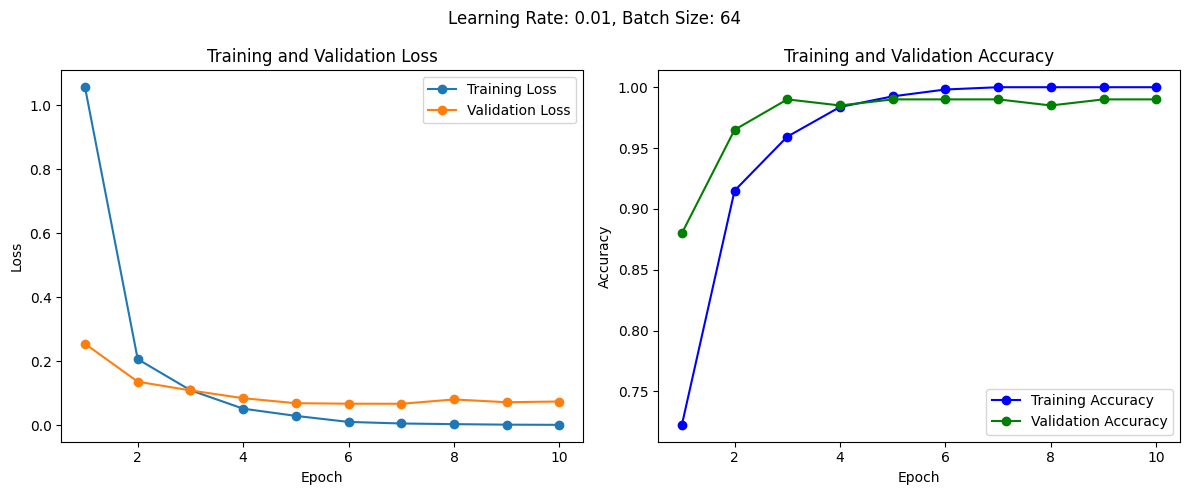

Test Accuracy: 0.9950

Experiment: Learning Rate = 0.1, Batch Size = 16
Epoch 1/10, Training Loss: 33.8445, Validation Loss: 0.6869, Training Accuracy: 0.4938, Validation Accuracy: 0.5600
Epoch 2/10, Training Loss: 0.6978, Validation Loss: 0.6994, Training Accuracy: 0.4950, Validation Accuracy: 0.4400
Epoch 3/10, Training Loss: 0.6986, Validation Loss: 0.6882, Training Accuracy: 0.5038, Validation Accuracy: 0.5600
Epoch 4/10, Training Loss: 0.6986, Validation Loss: 0.6911, Training Accuracy: 0.5238, Validation Accuracy: 0.5600
Epoch 5/10, Training Loss: 0.6965, Validation Loss: 0.6873, Training Accuracy: 0.4963, Validation Accuracy: 0.5600
Epoch 6/10, Training Loss: 0.7029, Validation Loss: 0.7278, Training Accuracy: 0.5025, Validation Accuracy: 0.4400
Epoch 7/10, Training Loss: 0.6958, Validation Loss: 0.7261, Training Accuracy: 0.5062, Validation Accuracy: 0.4400
Epoch 8/10, Training Loss: 0.7026, Validation Loss: 0.6988, Training Accuracy: 0.5238, Validation Accuracy: 0.4400
Epoch 9

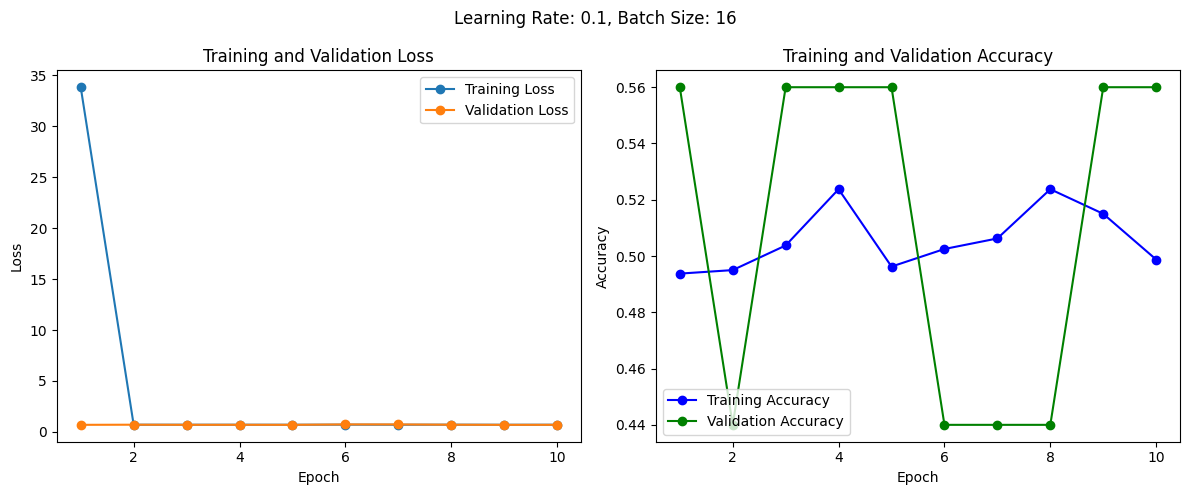

Test Accuracy: 0.5300

Experiment: Learning Rate = 0.1, Batch Size = 32
Epoch 1/10, Training Loss: 112.7101, Validation Loss: 0.6881, Training Accuracy: 0.5075, Validation Accuracy: 0.5600
Epoch 2/10, Training Loss: 0.6949, Validation Loss: 0.6876, Training Accuracy: 0.4863, Validation Accuracy: 0.5600
Epoch 3/10, Training Loss: 0.6941, Validation Loss: 0.6884, Training Accuracy: 0.5038, Validation Accuracy: 0.5600
Epoch 4/10, Training Loss: 0.6937, Validation Loss: 0.7057, Training Accuracy: 0.5050, Validation Accuracy: 0.4400
Epoch 5/10, Training Loss: 0.6949, Validation Loss: 0.6882, Training Accuracy: 0.4875, Validation Accuracy: 0.5600
Epoch 6/10, Training Loss: 0.6960, Validation Loss: 0.6996, Training Accuracy: 0.5050, Validation Accuracy: 0.4400
Epoch 7/10, Training Loss: 0.6945, Validation Loss: 0.6882, Training Accuracy: 0.5050, Validation Accuracy: 0.5600
Epoch 8/10, Training Loss: 0.6951, Validation Loss: 0.7013, Training Accuracy: 0.4975, Validation Accuracy: 0.4400
Epoch 

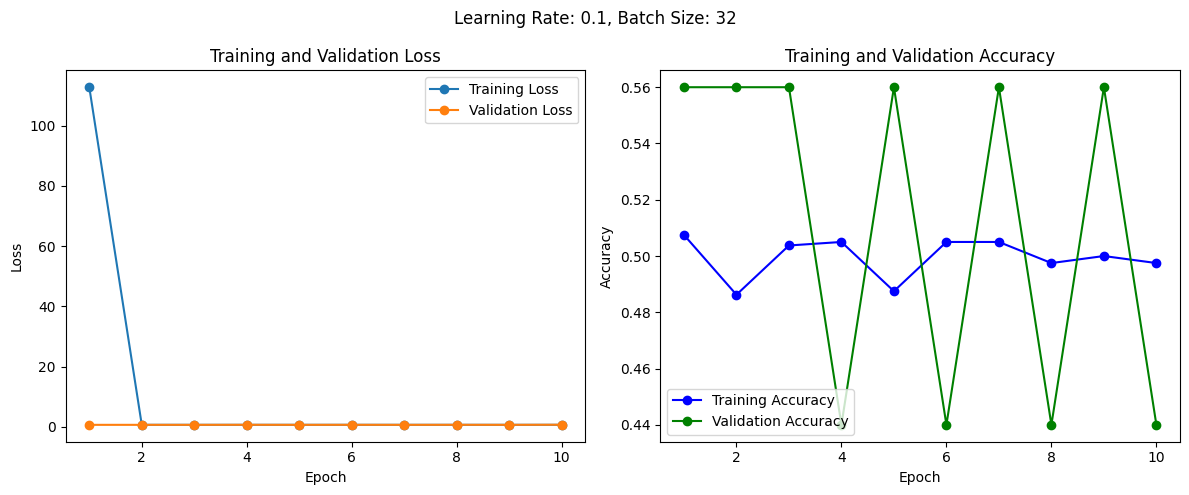

Test Accuracy: 0.4700

Experiment: Learning Rate = 0.1, Batch Size = 64
Epoch 1/10, Training Loss: 232.9865, Validation Loss: 0.7319, Training Accuracy: 0.5144, Validation Accuracy: 0.4400
Epoch 2/10, Training Loss: 0.6990, Validation Loss: 0.6968, Training Accuracy: 0.4850, Validation Accuracy: 0.4400
Epoch 3/10, Training Loss: 0.6949, Validation Loss: 0.6954, Training Accuracy: 0.4988, Validation Accuracy: 0.4400
Epoch 4/10, Training Loss: 0.6939, Validation Loss: 0.6919, Training Accuracy: 0.5088, Validation Accuracy: 0.5600
Epoch 5/10, Training Loss: 0.6944, Validation Loss: 0.6903, Training Accuracy: 0.4975, Validation Accuracy: 0.5600
Epoch 6/10, Training Loss: 0.6955, Validation Loss: 0.6997, Training Accuracy: 0.4938, Validation Accuracy: 0.4400
Epoch 7/10, Training Loss: 0.6944, Validation Loss: 0.6919, Training Accuracy: 0.5025, Validation Accuracy: 0.5600
Epoch 8/10, Training Loss: 0.6949, Validation Loss: 0.6950, Training Accuracy: 0.5025, Validation Accuracy: 0.4400
Epoch 

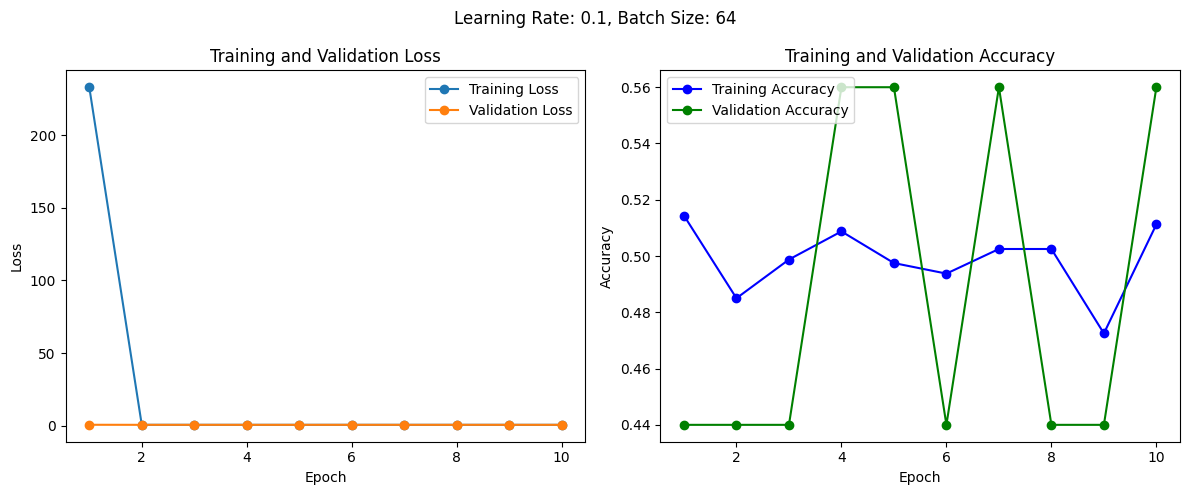

Test Accuracy: 0.5300
Trained model saved at: simple_cnn_model.pth
Predicted class index for image dataset/leopard/0122.jpg: 0


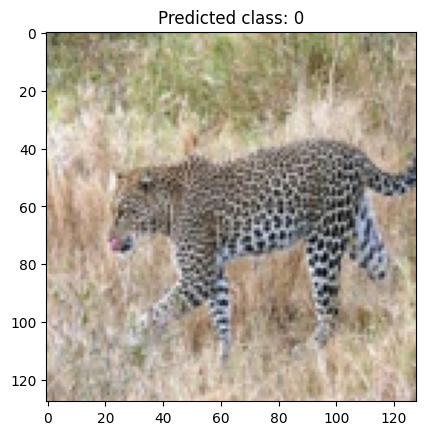

Predicted class index for image dataset/tiger/0014.jpg: 0


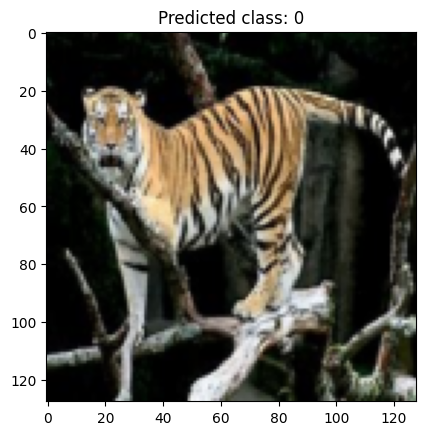

Predicted class index for image dataset/tiger/0127.jpg: 0


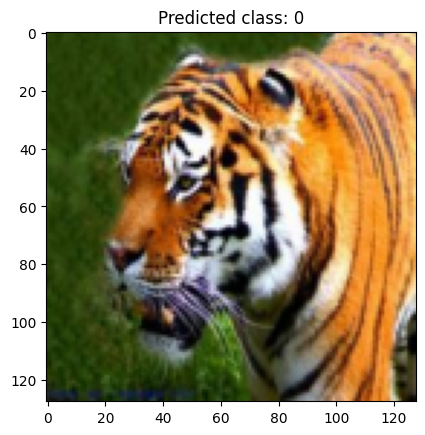

Predicted class index for image dataset/tiger/0118.jpg: 0


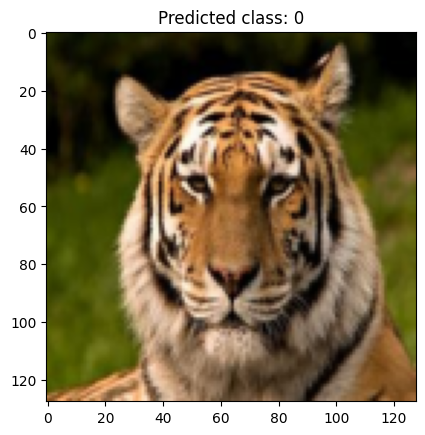

In [11]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    img_train, labels_train, img_val, labels_val, img_test, labels_test = load_dataset(
        "annotation.csv")

    unique_labels = list(set(labels_train + labels_val + labels_test))
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

    trained_model = main("annotation.csv", num_epochs=10)

    model_save_path = "simple_cnn_model.pth"
    torch.save(trained_model.state_dict(), model_save_path)
    print(f"Trained model saved at: {model_save_path}")

    new_model = SimpleCNN(num_classes=len(unique_labels)).to(device)
    new_model.load_state_dict(torch.load(model_save_path))
    new_model.eval()

    random_img_paths = [
        f"dataset/leopard/{str(i).zfill(4)}.jpg" for i in range(200)
    ] + [
        f"dataset/tiger/{str(i).zfill(4)}.jpg" for i in range(200)
    ]

    img_paths = random.sample(random_img_paths, k=4)

    for img_path in img_paths:
        img = Image.open(img_path).convert("RGB")

        transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
        ])
        sample_image = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = new_model(sample_image)
            _, predicted_class = torch.max(output, 1)

        print(
            f"Predicted class index for image {img_path}: {predicted_class.item()}")

        img_array = transforms.ToPILImage()(sample_image.squeeze(0).cpu())
        plt.imshow(img_array)
        plt.title(f"Predicted class: {predicted_class.item()}")
        plt.show()

–ò—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤:

Learning Rate:  
–°–ª–∏—à–∫–æ–º –≤—ã—Å–æ–∫–∏–π learning rate (0.1) –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ä–∞—Å—Ö–æ–¥–∏–º—É –º–æ–¥–µ–ª–∏. –û–±—É—á–µ–Ω–∏–µ –Ω–µ —Å—Ö–æ–¥–∏—Ç—Å—è, –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–∏–∑–∫–æ–π.  
Learning rate 0.001 –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.

Batch Size:  
–ë–æ–ª—å—à–∏–π —Ä–∞–∑–º–µ—Ä –ø–∞–∫–µ—Ç–∞ (64) –¥–∞–µ—Ç —Ö—É–¥—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –º–µ–Ω—å—à–∏–º–∏ —Ä–∞–∑–º–µ—Ä–∞–º–∏ –ø–∞–∫–µ—Ç–∞ (16, 32). –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π —Ä–∞–∑–º–µ—Ä –ø–∞–∫–µ—Ç–∞ –∑–∞—Ç—Ä—É–¥–Ω—è–µ—Ç —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å.

–û–±—â–∏–µ –≤—ã–≤–æ–¥—ã:  
–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏ learning rate 0.001 –∏ batch size 32.  
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è 99.5%, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ö–æ—Ä–æ—à—É—é –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

–û—Ü–µ–Ω–∫–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏:  
–ù–∞ –ø—Ä–∏–º–µ—Ä–∞—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (dataset/leopard/0122.jpg, dataset/tiger/0014.jpg, dataset/tiger/0127.jpg, dataset/tiger/0118.jpg) –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –∫–ª–∞—Å—Å—ã –¥–ª—è –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –≠—Ç–æ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.üò≠
